#Supply Chain Analysis
The supply Chain is the network of production and logistics involved in producing and delivering goods to customers. And Supply Chain Analysis means analyzing various components of a Supply Chain to understand how to improve the effectiveness of the Supply Chain to create more value for customers.

In [ ]:
# importing python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Column name and details about that columns.

**Product type:** The category of the product (e.g., haircare, skincare).

**SKU:** Stock Keeping Unit, a unique identifier for each product.

**Price:** The price of the product.

**Availability:** The current availability of the product (in units).

**Number of products sold:** Total number of units sold for the product.

**Revenue generated:** The revenue generated from the sale of the product.

**Customer demographics:** Demographic information about the customer (e.g., gender or unspecified).

**Stock levels:** The number of units currently in stock.

**Lead times:** The time taken (in days) to fulfill an order.

**Order quantities:** The quantity of products ordered.

**Location:** The geographical location where the product is stored or shipped from.

**Lead time:** A repeat of the earlier lead time information, but specific to the location.

**Production volumes:** The number of units produced.

**Manufacturing lead time:** The time taken (in days) to manufacture the product.

**Manufacturing costs:** The cost of manufacturing the product.

**Inspection results:** Outcome of product inspection (e.g., Pass, Fail, Pending).

**Defect rates:** The percentage of products that were found defective.

**Transportation modes:** The mode of transportation used to deliver the product (e.g., Road, Air, Rail).

**Routes:** The specific transportation route used for the product delivery.

**Costs:** The transportation cost associated with the product shipment.

In [ ]:
# read csv file

df = pd.read_csv('/content/supply_chain_data.csv')

In [ ]:
# top 5 rows

df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [ ]:
# Transposing column to row that we can see all the columns

df.head().T

,0,1,2,3,4
Product type,haircare,skincare,haircare,skincare,skincare
SKU,SKU0,SKU1,SKU2,SKU3,SKU4
Price,69.808006,14.843523,11.319683,61.163343,4.805496
Availability,55,95,34,68,26
Number of products sold,802,736,8,83,871
Revenue generated,8661.996792,7460.900065,9577.749626,7766.836426,2686.505152
Customer demographics,Non-binary,Female,Unknown,Non-binary,Non-binary
Stock levels,58,53,1,23,5
Lead times,7,30,10,13,3
Order quantities,96,37,88,59,56


In [ ]:
# Shape of the data /  Total rows and columns

df.shape

(100, 24)

In [ ]:
# Checking datatype and null columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [ ]:
# Checking null values

df.isna().sum()

,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


In [ ]:
#  Statistical deviation of dataset

df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


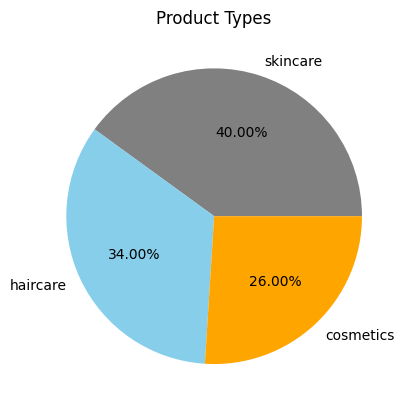

In [42]:
# Products types total stocks in given data

df['Product type'].value_counts().plot(kind='pie',autopct = '%1.2f%%',colors=['grey','skyblue','orange'])
plt.title('Product Types')
plt.ylabel('')
plt.show()

In [ ]:
# Availability of product by their product type

Availability_of_products = df.groupby('Product type')['Availability'].sum().reset_index()

Availability_of_products

,Product type,Availability
0,cosmetics,1332
1,haircare,1471
2,skincare,2037


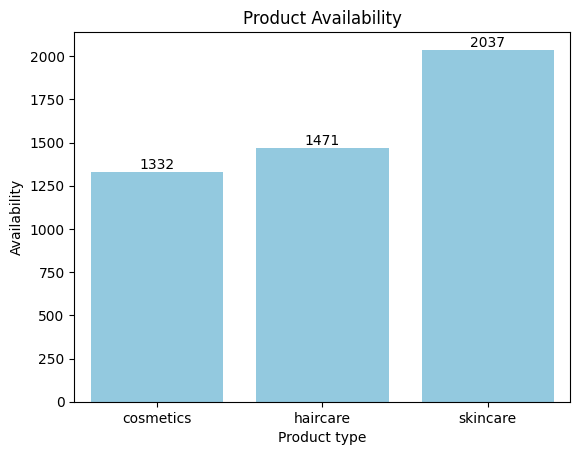

In [ ]:
xz = sns.barplot(data = Availability_of_products,x='Product type',y='Availability',color = 'skyblue')
plt.title('Product Availability')
for i in xz.containers:
  xz.bar_label(i)
plt.show()

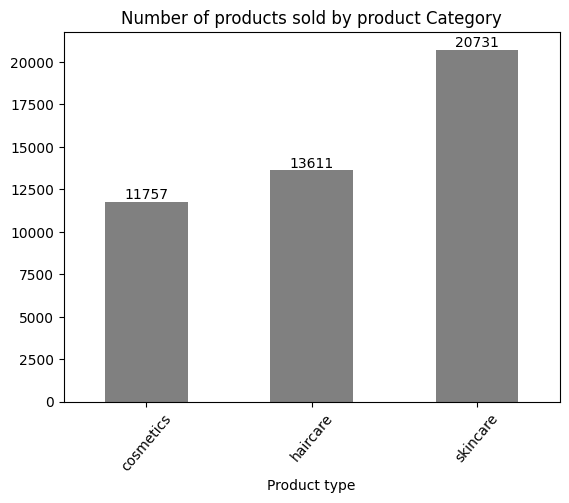

In [ ]:
# Number of products sold by product type

xz = df.groupby('Product type')['Number of products sold'].sum().plot(kind='bar',x='Product type',y='Number of products sold',color='grey')
plt.title('Number of products sold by product Category')
for i in xz.containers:
  xz.bar_label(i)
plt.xticks(rotation=50)
plt.show()

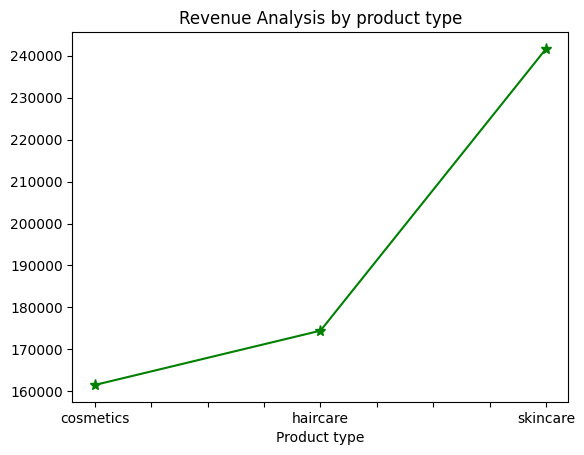

In [ ]:
# Revenue analysis by product types

df.groupby('Product type')['Revenue generated'].sum().plot(kind='line',marker='*',markersize=8,color = 'green')
plt.title('Revenue Analysis by product type')
plt.show()

In [ ]:
# Price distribution according to the product types

product_prices = df.groupby('Product type')['Price'].sum().reset_index()
product_prices

,Product type,Price
0,cosmetics,1491.387498
1,haircare,1564.485482
2,skincare,1890.373155


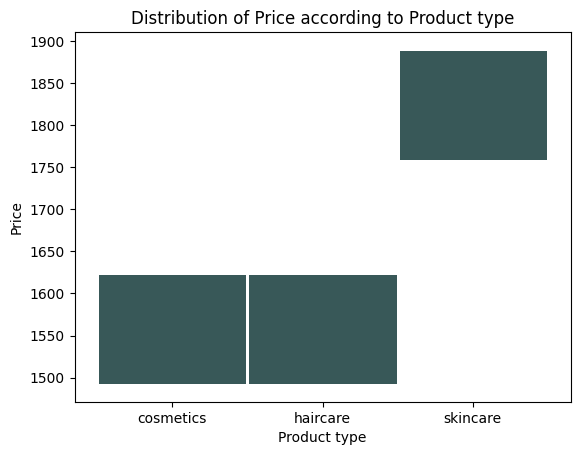

In [ ]:
sns.histplot(data=product_prices,x='Product type',y='Price',color='cyan',edgecolor='white')
plt.title('Distribution of Price according to Product type')
plt.show()

In [ ]:
# counting Customer demographics according to product types

demographics = df.groupby('Product type')['Customer demographics'].value_counts().to_frame()
demographics

count
Product type Customer demographics       
cosmetics    Female                    10
             Unknown                    7
             Non-binary                 5
             Male                       4
haircare     Unknown                   15
             Male                      10
             Non-binary                 7
             Female                     2
skincare     Female                    13
             Non-binary                11
             Unknown                    9
             Male                       7

<ipython-input-26-f05f6a94fe21>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:gold'` for the same effect.

  xz = sns.barplot(data=demographics,x='Product type',y='count',hue='Customer demographics',color='gold')


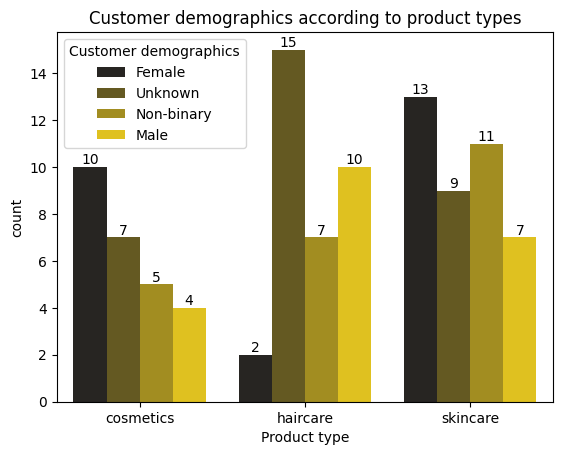

In [ ]:
xz = sns.barplot(data=demographics,x='Product type',y='count',hue='Customer demographics',color='gold')
plt.title('Customer demographics according to product types')
for i in xz.containers:
  xz.bar_label(i)
plt.show()

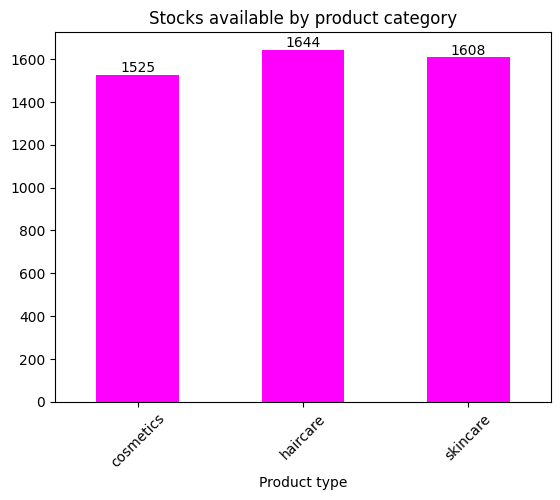

In [ ]:
# Total stock levels by their product category

xz = df.groupby('Product type')['Stock levels'].sum().plot(kind='bar',color='magenta')
plt.title('Stocks available by product category')
for i in xz.containers:
  xz.bar_label(i)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Total Shipping Costs by Carrier and Location

cost_by_location = round(df.groupby(['Shipping carriers','Location'])['Shipping costs'].sum(),2).to_frame()
cost_by_location

Shipping costs
Shipping carriers Location                 
Carrier A         Bangalore           39.66
                  Chennai             36.76
                  Delhi               25.33
                  Kolkata             27.65
                  Mumbai              26.13
Carrier B         Bangalore           46.54
                  Chennai             28.01
                  Delhi               30.76
                  Kolkata             66.09
                  Mumbai              65.49
Carrier C         Bangalore           17.27
                  Chennai             29.01
                  Delhi               19.96
                  Kolkata             50.29
                  Mumbai              45.86

<ipython-input-20-9129ecaee863>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:magenta'` for the same effect.

  xz = sns.barplot(data=cost_by_location,x='Shipping carriers',y='Shipping costs',hue='Location',color='magenta')


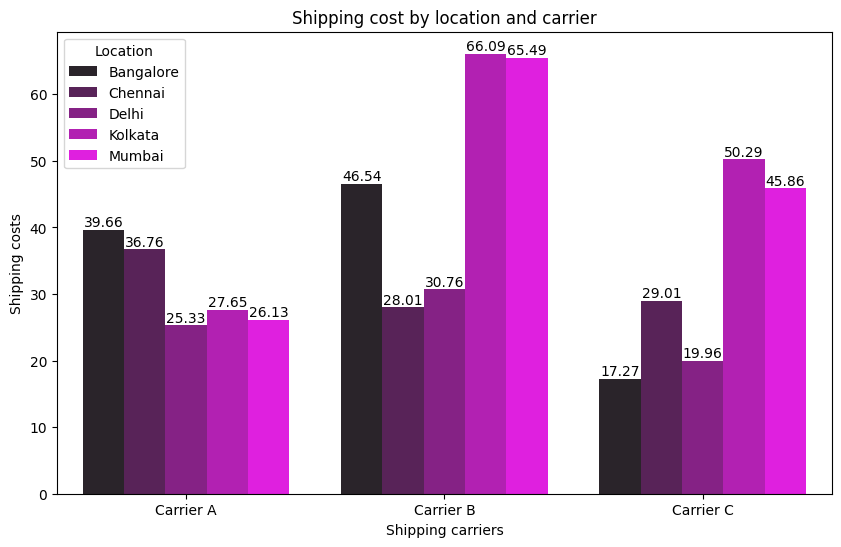

In [ ]:
plt.figure(figsize=(10,6))
xz = sns.barplot(data=cost_by_location,x='Shipping carriers',y='Shipping costs',hue='Location',color='magenta')
plt.title('Shipping cost by location and carrier')
for i in xz.containers:
  xz.bar_label(i)
plt.show()

In [ ]:
# Total Count of inspection results by product type

Inspection_by_product = df.groupby('Product type')['Inspection results'].value_counts().to_frame()
Inspection_by_product

count
Product type Inspection results       
cosmetics    Fail                   10
             Pending                10
             Pass                    6
haircare     Pending                15
             Fail                   13
             Pass                    6
skincare     Pending                16
             Fail                   13
             Pass                   11

<ipython-input-22-4cad4388e065>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  xz = sns.barplot(data=Inspection_by_product,x='Product type',y='count',hue='Inspection results',color='orange')


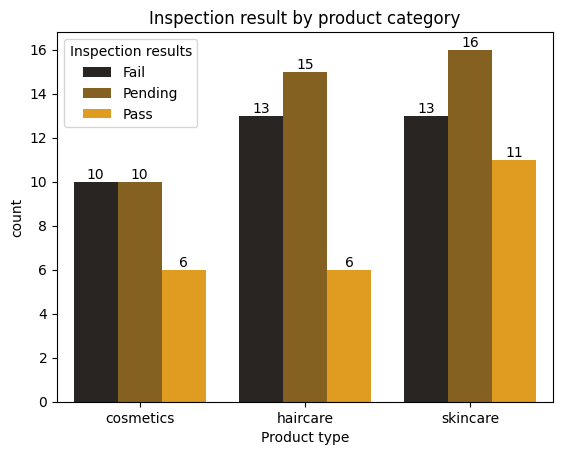

In [ ]:
xz = sns.barplot(data=Inspection_by_product,x='Product type',y='count',hue='Inspection results',color='orange')
plt.title('Inspection result by product category')
for i in xz.containers:
  xz.bar_label(i)
plt.show()

In [ ]:
# Correlation Matrix for Lead Time, Order Quantities, and Manufacturing Costs

df_corr = df[['Lead time','Order quantities','Manufacturing costs']]
cor_col = df_corr.corr()
cor_col

,Lead time,Order quantities,Manufacturing costs
Lead time,1.000000,-0.086189,-0.121999
Order quantities,-0.086189,1.000000,-0.026784
Manufacturing costs,-0.121999,-0.026784,1.000000


<Axes: >

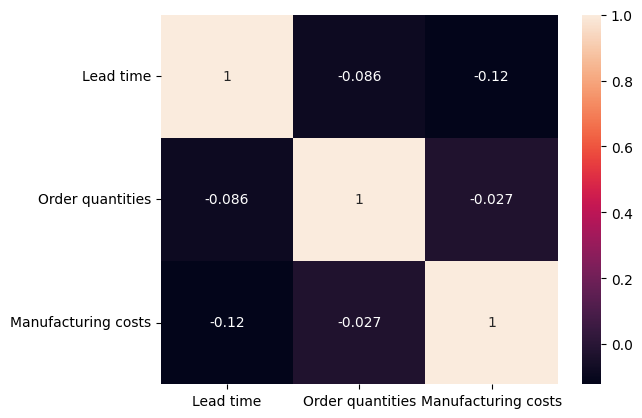

In [ ]:
sns.heatmap(data= cor_col,annot = True)

In [ ]:
# Average Defect Rates by Product Type

average_defect = round(df.groupby('Product type')['Defect rates'].mean().to_frame(),2)
average_defect

,Defect rates
Product type,
cosmetics,1.92
haircare,2.48
skincare,2.33


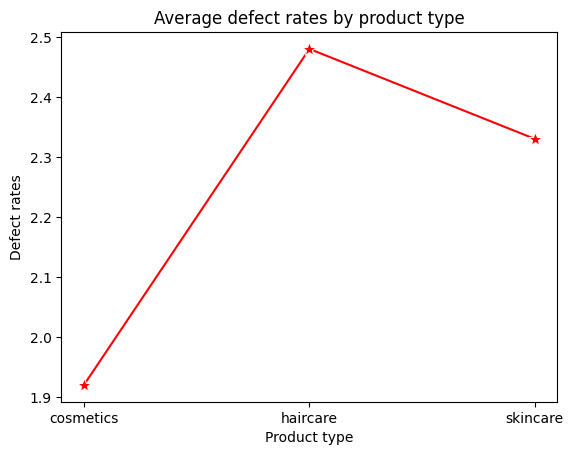

In [ ]:
sns.lineplot(data=average_defect,x='Product type',y='Defect rates',color='red',marker='*',markersize=10)
plt.title('Average defect rates by product type')
plt.show()

In [45]:
transportation_mode_by_prod =  df.groupby(['Product type','Transportation modes'])['Lead times'].sum().to_frame()
transportation_mode_by_prod

Lead times
Product type Transportation modes            
cosmetics    Air                           74
             Rail                         174
             Road                          69
             Sea                           83
haircare     Air                          170
             Rail                          87
             Road                         239
             Sea                           32
skincare     Air                          231
             Rail                         156
             Road                         189
             Sea                           92

<ipython-input-48-093c6cc85d18>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  xz = sns.barplot(data=transportation_mode_by_prod,x='Product type',y='Lead times',hue='Transportation modes',color='blue')


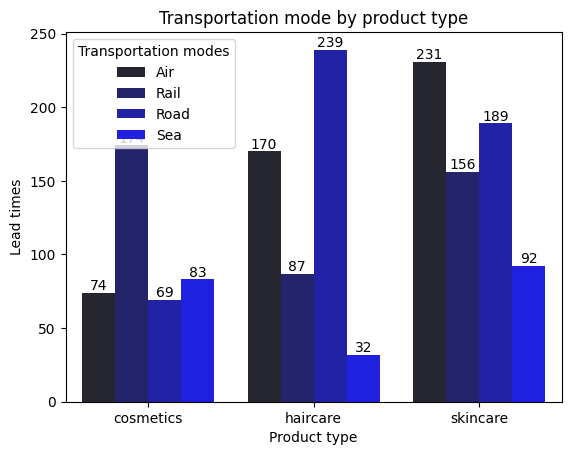

In [48]:
xz = sns.barplot(data=transportation_mode_by_prod,x='Product type',y='Lead times',hue='Transportation modes',color='blue')
plt.title('Transportation mode by product type')
for i in xz.containers:
  xz.bar_label(i)
plt.show()

#Key Insights:
  **Product Performance:** Haircare and skincare products show notable differences in availability, sales, and revenue.

  **Stock and Availability:** Higher stock levels generally improve product availability and sales performance.

  **Lead Times:** Longer lead times tend to decrease the number of products sold.

  **Revenue Drivers:** Certain products generate more revenue despite lower sales, indicating potential price influence.

  **Transportation Modes:** Air and rail transportation are costlier but could offer faster delivery times.

  **Quality Control:** High defect rates and failed inspections impact several products, affecting customer satisfaction.


#Conclusion:
  **Optimize Stock Levels:** Ensuring adequate stock can prevent product shortages and improve sales.

  **Minimize Lead Times:** Reducing lead times will likely boost product availability and customer satisfaction.

  **Control Transportation Costs:** Managing air and rail transport costs can enhance overall profitability.

  **Improve Quality Control:** Addressing high defect rates and inspection failures will lead to better product quality and reduced returns.

  **Focus on Efficiency:** Streamlining inventory management, transportation, and quality control can significantly improve supply chain performance and profitability.



In [49]:
! jupyter nbconvert --to html /content/Supply_Chain_Analysis.ipynb

[NbConvertApp] Converting notebook /content/Supply_Chain_Analysis.ipynb to html
[NbConvertApp] Writing 1158581 bytes to /content/Supply_Chain_Analysis.html
